# Classificatie met ResNet

- Minor Applied AI
- 14 march 2023
- Frank Aldershoff & Michiel Bontenbal


## Importeer libraries

In [25]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image
from sklearn.datasets import load_sample_image
import tensorflow as tf
from tensorflow import keras

## Laad en toon foto's

In [38]:
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
elephant = imread("elephant.jpg") 

print("This the shape of china image {}".format(china.shape))
print("This the shape of flower image{}".format(flower.shape))
print("This the shape of elephant image{}".format(elephant.shape))

This the shape of china image (427, 640, 3)
This the shape of flower image(427, 640, 3)
This the shape of elephant image(427, 640, 3)


(3, 427, 640, 3)


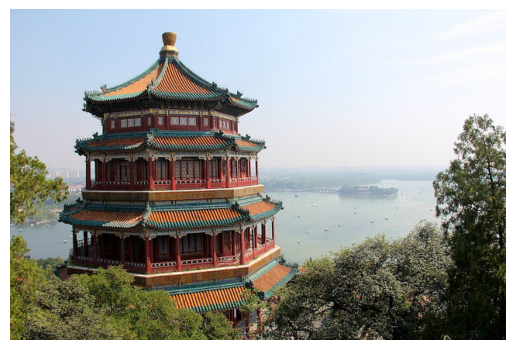

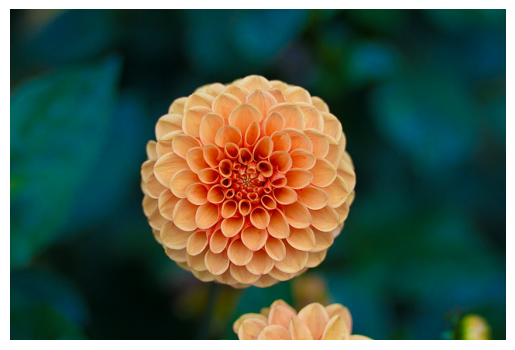

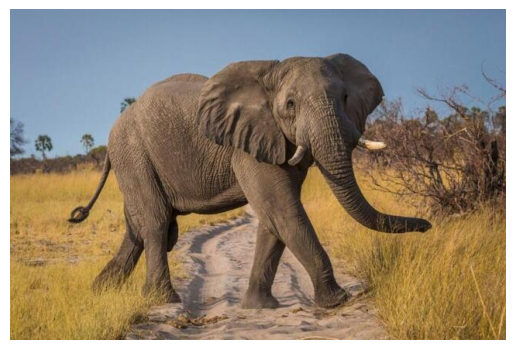

In [39]:
images = np.array([china, flower, elephant])

batch_size, height, width, channels = images.shape
print(images.shape)

plt.imshow(images[0, :, :, :])
plt.axis("off") 
plt.show()

plt.imshow(images[1, :, :, :]) 
plt.axis("off") 
plt.show()

plt.imshow(images[2, :, :, :]) 
plt.axis("off") 
plt.show()

## Wijzig formaat van foto's

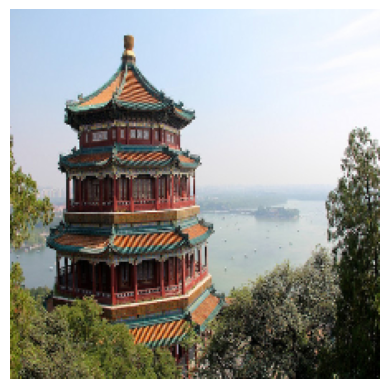

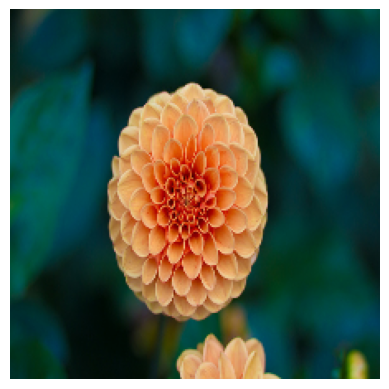

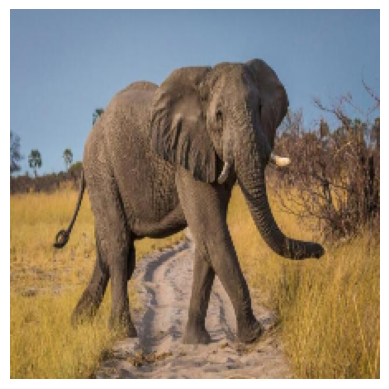

In [40]:
images_resized = tf.image.resize(images, [224, 224])
#images_resized = tf.image.resize_with_pad(images, 224, 224)
#images_resized = tf.image.resize_with_crop_or_pad(images, 224, 224)

plt.imshow(images_resized[0, :, :, :]/255)
plt.axis("off") 
plt.show()

plt.imshow(images_resized[1, :, :, :]/255) 
plt.axis("off") 
plt.show()

plt.imshow(images_resized[2, :, :, :]/255) 
plt.axis("off") 
plt.show()

## Laad pre-trained model

zie https://keras.io/api/applications/


In [41]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")

102967424/102967424 [==============================] - 35s 0us/step


## Bepaal classificatie van de afbeeldingen met ResNet50

In [42]:
inputs = keras.applications.resnet50.preprocess_input(images_resized)

Y_proba = model.predict(inputs, steps=1)

top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=5)

for image_index in range(len(images)):
    print("Image #{}".format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
    print()

35363/35363 [==============================] - 0s 0us/step
Image #0
  n02825657 - bell_cote    82.35%
  n03877845 - palace       6.75%
  n03781244 - monastery    4.19%
  n02980441 - castle       3.16%
  n03028079 - church       1.00%

Image #1
  n03530642 - honeycomb    49.81%
  n13040303 - stinkhorn    33.96%
  n02206856 - bee          4.35%
  n11939491 - daisy        3.23%
  n12985857 - coral_fungus 2.66%

Image #2
  n02504458 - African_elephant 47.29%
  n01871265 - tusker       46.32%
  n02504013 - Indian_elephant 6.39%
  n02437312 - Arabian_camel 0.00%
  n01704323 - triceratops  0.00%



**OPDRACHT**: wat is de invloed van de verschillende manieren van "resizen" op de classificatie?

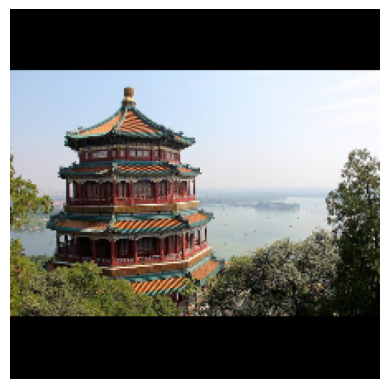

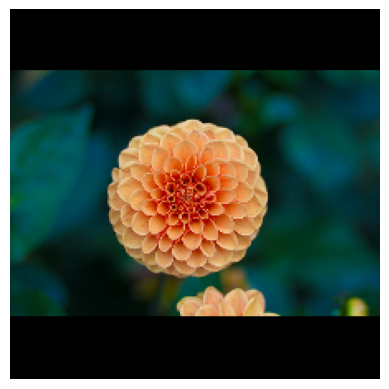

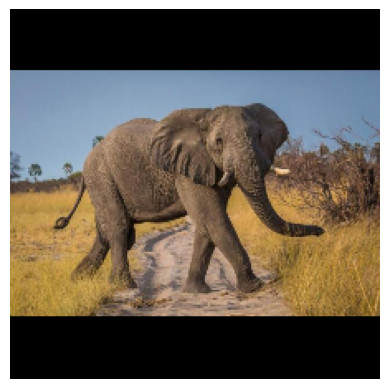

In [45]:
# images_resized = tf.image.resize(images, [224, 224])
images_resized = tf.image.resize_with_pad(images, 224, 224)
#images_resized = tf.image.resize_with_crop_or_pad(images, 224, 224)

plt.imshow(images_resized[0, :, :, :]/255)
plt.axis("off") 
plt.show()

plt.imshow(images_resized[1, :, :, :]/255) 
plt.axis("off") 
plt.show()

plt.imshow(images_resized[2, :, :, :]/255) 
plt.axis("off") 
plt.show()

<b> Hier worden de images met zwarte randen resized. Hieronder laten we het model op deze images toepassen. 

In [46]:
inputs = keras.applications.resnet50.preprocess_input(images_resized)

Y_proba = model.predict(inputs, steps=1)

top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=5)

for image_index in range(len(images)):
    print("Image #{}".format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))

1/1 [==============================] - 0s 161ms/step
Image #0
  n03028079 - church       23.95%
  n02825657 - bell_cote    18.98%
  n04346328 - stupa        10.08%
  n03781244 - monastery    9.70%
  n02980441 - castle       7.51%
Image #1
  n03530642 - honeycomb    37.25%
  n11939491 - daisy        12.07%
  n04522168 - vase         9.74%
  n09229709 - bubble       4.29%
  n07930864 - cup          3.45%
Image #2
  n02504458 - African_elephant 54.49%
  n02504013 - Indian_elephant 23.50%
  n01871265 - tusker       22.01%
  n01704323 - triceratops  0.00%
  n02437312 - Arabian_camel 0.00%


<b> We kunnen zien het verschillen qua procenten. Bijvoorbeeld bij china afbeelding had de model als hoogste voorspelling bell_cote maar na de herschalen van de afbeeldingen staat church op de eerste plaats. 

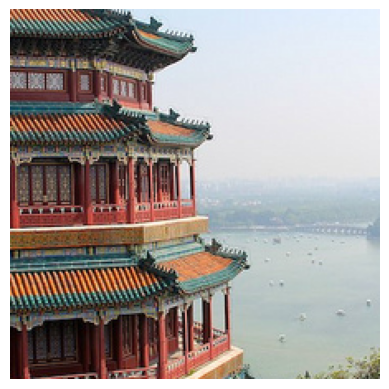

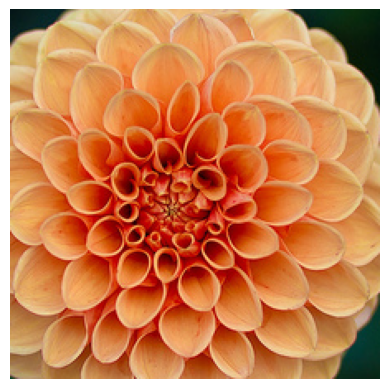

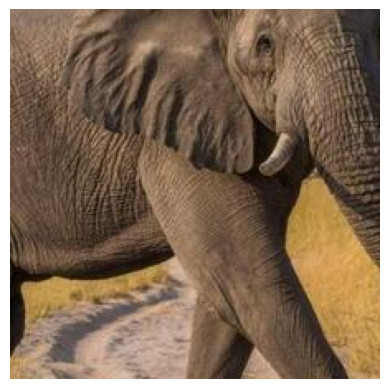

In [47]:
# images_resized = tf.image.resize(images, [224, 224])
# images_resized = tf.image.resize_with_pad(images, 224, 224)
images_resized = tf.image.resize_with_crop_or_pad(images, 224, 224)

plt.imshow(images_resized[0, :, :, :]/255)
plt.axis("off") 
plt.show()

plt.imshow(images_resized[1, :, :, :]/255) 
plt.axis("off") 
plt.show()

plt.imshow(images_resized[2, :, :, :]/255) 
plt.axis("off") 
plt.show()

<b> Hier hebben we de afbeeldingen weer anders geschaald. Hier zijn ze ingezoomd.

In [48]:
inputs = keras.applications.resnet50.preprocess_input(images_resized)

Y_proba = model.predict(inputs, steps=1)

top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=5)

for image_index in range(len(images)):
    print("Image #{}".format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))

1/1 [==============================] - 1s 1s/step
Image #0
  n04243546 - slot         18.70%
  n03240683 - drilling_platform 11.68%
  n04149813 - scoreboard   11.32%
  n02825657 - bell_cote    6.53%
  n02966193 - carousel     5.01%
Image #1
  n03938244 - pillow       22.95%
  n02776631 - bakery       11.18%
  n07614500 - ice_cream    7.07%
  n07734744 - mushroom     5.06%
  n11939491 - daisy        4.87%
Image #2
  n03720891 - maraca       21.54%
  n03729826 - matchstick   11.32%
  n03347037 - fire_screen  4.76%
  n03970156 - plunger      4.14%
  n04208210 - shovel       3.95%


<b> We zien dat hier hele andere voorspellingen.